# Part 1

Q1: Use library scripts to generate p-ER random graphs and
r-regular random graph. Let K denote the number of nodes.

In [1]:
import networkx as nx
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
def g_ER(K,p): #an ars is included with probability p independently of any other arc
    G_p = nx.erdos_renyi_graph(K, p)
    return(G_p)
def g_r(K,r): # K>r>=3 AND Kr is EVEN
    G_r = nx.random_regular_graph(r,K)  
    return(G_r)

Q2: Write a script to check the connectivity of a given graph.

1. Algebraic method 1 (irreducibility)

In [32]:
def connectivity_irreducible(G):
    A= nx.adjacency_matrix(G).toarray()
    n=A.shape[0]
    sum_matrix=np.linalg.matrix_power(np.add(np.eye(n),A),n-1)
    if np.all(sum_matrix >0): 
        return(True)
    else:
        return(False)
# REFERENCE ABOUT THE THEORY: 
# https://math.stackexchange.com/questions/315453/how-does-one-show-a-matrix-is-irreducible-and-reducible


2. Algebraic method 2 (eigenvalue of the Laplacian matrix)

In [60]:
from scipy import sparse
def method_2(G):
    degree_dict = nx.degree(G)
    degree_list = [x[1] for x in degree_dict]
    lap_matrix = sparse.diags(degree_list, 0)-nx.adjacency_matrix(G)
    eigval, eigvec = sparse.linalg.eigsh(lap_matrix, 2, sigma=0, which='LM')
    if eigval[1]>0:
        return True
    else:
        return False

In [62]:
g=g_r(6,3)
connect = method_2(g)
print(connect)

True


C:\Users\soph\AppData\Local\Temp\ipykernel_13936\1216681526.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  lap_matrix = sparse.diags(degree_list, 0)-nx.adjacency_matrix(G)


3. Breadth-first search algorithm

In [4]:
# Check the connectivity of a given graph using breadth-first search algorithm
import queue

def BFS(G, root):
    distance = {}
    parent = {}
    for n in G:
        distance[n] = float('inf')
        parent[n] = []
    
    Q = queue.Queue()
    distance[root] = 0
    Q.put(root)
    while Q.empty() != True:
        current = Q.get()
        neighbors = G.neighbors(current)
        for n in neighbors:
            if distance[n] == float('inf'):
                distance[n] = distance[current] + 1
                parent[n] = current
                Q.put(n)
    
    return distance


def check_connectivity_BFS(G, root): 
    distance = BFS(G, root)
    for node in distance:
        # if we find some node distance equal to infinity, it means that the node is not reachable 
        # so the graph is also not connected
        if distance[node] == float('inf'):  
            return "The graph is not connected."
        
    return "The graph is connected."

In [5]:
G=nx.erdos_renyi_graph(100, 0.2)

In [6]:
print('is_connect:',nx.is_connected(G))
print('irreducibility:',connectivity_irreducible(G))
print('BFS:',check_connectivity_BFS(G,0))

is_connect: True
irreducibility: True
BFS: The graph is connected.


C:\Users\Michele\AppData\Local\Temp\ipykernel_28900\3957628656.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A= nx.adjacency_matrix(G).toarray()


Q3: Compare the complexity as a function of K of the methods
above by plotting curves of a complexity measure vs K.

Q4: Let pc (G) denote the probability that a graph G is connected.
By running Monte Carlo simulations, estimate pc (G) and
produce two curve plots:
- pc (G) vs. p for Erd˝os-R´enyi graphs with K = 100;
- pc (G) vs. K, for K ≤ 100, for r-regular random graphs with r = 2 and r = 8.


In [7]:
def MonteCarlo_ER(sim_tot,sim_p):
    K=100
    data=list()
    #sim_tot=10**2
    for j in range(sim_tot):
        p=np.random.uniform(0,1)
        Result_sim=list()
        #sim_p=10**3
        for i in range(sim_p):
            G=g_ER(K,p)
            Result_sim.append(nx.is_connected(G)) #to change in case our functions are faster
        data.append((p,np.mean(Result_sim),np.std(Result_sim)))
    data=sorted(data, key=lambda x: x[0])
    return(data)
#######################################################
def MonteCarlo_r(r,sim_tot,sim_K):
    data=list()
    for j in range(sim_tot):
        K=np.random.randint(r+1,101)
        Result_sim=list()
        for i in range(sim_K):
            G=g_r(K,r)
            Result_sim.append(nx.is_connected(G)) #to change in case our functions are faster
        data.append((K,np.mean(Result_sim),np.std(Result_sim)))
    data=sorted(data, key=lambda x: x[0]) 
    return(data)


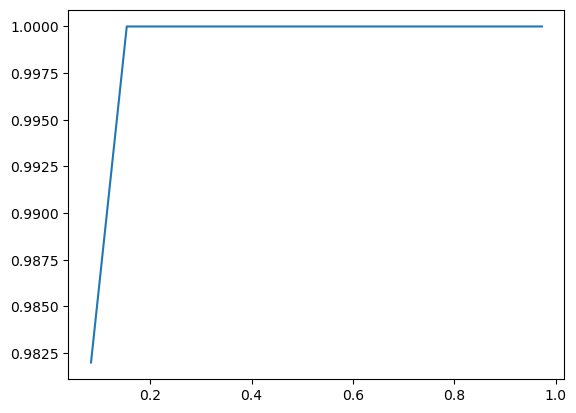

In [8]:
data_ER=MonteCarlo_ER(10,1000)
x_ER=[i[0] for i in data_ER]
y_ER=[i[1] for i in data_ER]
plt.plot(x_ER,y_ER)

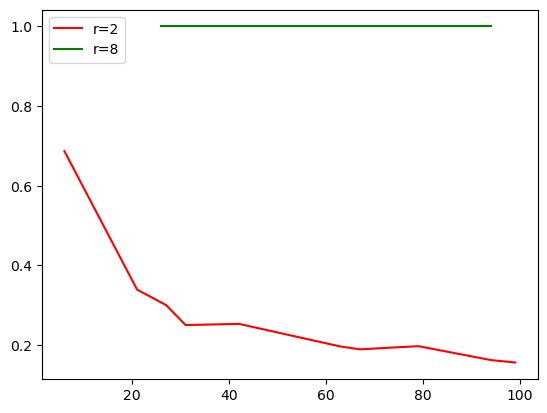

In [9]:
data_r2=MonteCarlo_r(2,10,1000)
x_r2=[i[0] for i in data_r2]
y_r2=[i[1] for i in data_r2]
##############################
data_r8=MonteCarlo_r(8,10,1000)
x_r8=[i[0] for i in data_r8]
y_r8=[i[1] for i in data_r8]

plt.plot(x_r2,y_r2,'r',label='r=2')
plt.plot(x_r8,y_r8,'g',label='r=8')
plt.legend()
plt.show()

# Part 2

Q1: Give a concise and accurate formal statement of the algorithm
you use to evaluate the mean response time (i.e., how you
conduct the statistical experiment to collect samples of R).


Q2: Plot the mean response time E[R] as a function of N for N
ranging between 1 and 10000.
- Let Rbaseline be the response time in case only server A is used, i.e., the job is run locally on A.
- In the plot normalize E[R] with respect to E[Rbaseline]

In [2]:
# link capacity in Gbit/s
C = 10 * (10**9)
# transmission time of each packet in µs
tau = 5 * (10**(-6)) 
# input file size in TB
Lf = 4 * (10**12) 
# output file size in TB
Lo = 4 * (10**12) 
# expected time the server takes to process a packet in seconds
E_X = 8 * 3600 
# fixed processing time in seconds
T_0 = 30 
# protocol overhead factor
xi = 0.1 
# arrival rate of packets
f = 48/1500 
# number of packets that can be in transit at any given time
n = 64 

To calculate the mean response time, we need to consider:
-  the time taken by each server to process its task;
-  the time taken to transfer the data from server A to the N servers;
- the time taken to transfer the output data from each server to server A. 

The total time can be calculated as follows:

E[R] = T_0 + Xi + [Lf/(θ_i * N)] + [Lo,i/(θ_i * N)]

where:
- T_0 + Xi is the task time and Xi is a negative exponential random variable with mean E[Xi] = E[X]/N;
- [Lf/(θ_i * N)] is the time taken to trasfer the data from server A to server i where Lf represents the size of the input, θ_i is is the processing time of the single server;
- [Lo,i/(θ_i * N)] is the time taken to tasfer the data from server i to server A where Lo,i represents the size of the output, θ_i is is the processing time of the single server.

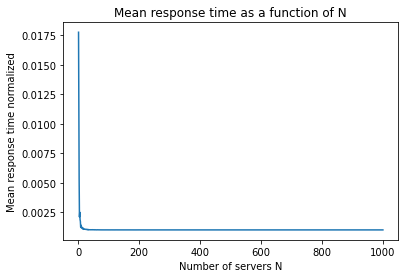

In [13]:
import random

def compute_TCP_connection(h):
    T_i = 2 * tau * h
    theta_i = C * (1/T_i) / np.sum(1/T_i)
    return theta_i

def compute_mean_response_time(N):
    hops = range(1, N+1)
    throughputs = [compute_TCP_connection(h) for h in hops]
    E_Xi = E_X/N
    Xi = np.random.exponential(scale=1/E_Xi)  
    Lf_i = Lf / N
    Lo_i = random.uniform(0, 2*(Lo/N))
    times = []
    for theta_i in throughputs:
     time_input = Lf_i / (theta_i * N) # total time the server takes to process all incoming data
     time_output = Lo_i / (theta_i * N) # total time the server takes to process all outgoing data
     times.append(T_0 + Xi + time_input + time_output) 
     
    return max(times)

N_values = range(1, 1001) # ! mettere 10001 
mean_response_time = [compute_mean_response_time(N) for N in N_values]
# ER_baseline is the response time when only server A is used, N = 1
ER_baseline = T_0 + E_X + Lf / (compute_TCP_connection(1) * N_values[0]) + Lo / (compute_TCP_connection(1) * N_values[0]) 
mean_response_time_norm = [ER / ER_baseline for ER in mean_response_time]

plt.plot(N_values, mean_response_time_norm)
plt.xlabel('Number of servers N')
plt.ylabel('Mean response time normalized')
plt.title('Mean response time as a function of N')
plt.show()

The Job running cost S is defined as

S = E[R] + ξ E[Θ]

where E[Θ] is the average server time used to run the job.
Θ is the time that server A is used, if the job runs locally on A. 

Otherwise, Θ is the sum of the times that all N servers are
used to run their respective tasks.

When communicating data back and forth from server A to
the N servers, using TCP connections, there is some overhead
involved. Specifically, the amount of bits sent through the
TCP connection is given by the sum of the application job
data plus an additional overhead, which is a fraction f of the
original data.

ξ = 0.1.
f = 48/1500.
n = 64.

If the job is split into N parallel tasks, that are run over N
servers (other than A), then

Each task takes a time T0 + Xi, 

where Xi is a negative exponential random variable with mean E[Xi] = E[X]/N.

Each server receives an amount of input data Lf /N.

The amount of output data produced by each server is a random variable Lo,i, uniformly distributed in [0, 2Lo /N].